In [12]:
import json
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding,BatchNormalization,Dropout,GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
file = open("Sarcasm_Headlines_Dataset_v2.json", 'r', encoding='utf-8')
sentences = []
labels= []
urls=[]
for line in file.readlines():
    dic = json.loads(line)
    sentences.append(dic['headline'])
    labels.append(dic['is_sarcastic'])
    urls.append(dic['article_link'])

In [3]:
# parameters

vocab_size = 5000
embedding_dim = 300
max_length = 150
training_size = 25000
epochs = 30
batch_size = 32

In [4]:
# split data
X_train = sentences[0:training_size]  # corpus
X_val = sentences[training_size:]  # corpus
y_train = labels[0:training_size]
y_val = labels[training_size:]

In [5]:
# tokenize data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=max_length, truncating='post')

X_val_seq = tokenizer.texts_to_sequences(X_val)
X_val_padded = pad_sequences(X_val_seq, padding='post', maxlen=max_length, truncating='post')

In [6]:
print(X_train_padded[0])
print(X_train_padded.shape)

X_train_padded = np.array(X_train_padded)
X_val_padded = np.array(X_val_padded)
y_train = np.array(y_train)
y_val = np.array(y_val)

[   1  325 3239    1 2479    3  672 1050    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
(25000, 150)


In [8]:
# modeling

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
# training
history = model.fit(X_train_padded, y_train, epochs=epochs , validation_data=(X_val_padded, y_val))

Train on 25000 samples, validate on 3619 samples
Epoch 1/30
25000/25000 [==============================] - 15s 602us/sample - loss: 0.5517 - accuracy: 0.7105 - val_loss: 0.3878 - val_accuracy: 0.8326
Epoch 2/30
25000/25000 [==============================] - 14s 568us/sample - loss: 0.3355 - accuracy: 0.8552 - val_loss: 0.3574 - val_accuracy: 0.8386
Epoch 3/30
25000/25000 [==============================] - 14s 571us/sample - loss: 0.2862 - accuracy: 0.8798 - val_loss: 0.3443 - val_accuracy: 0.8486
Epoch 4/30
25000/25000 [==============================] - 14s 576us/sample - loss: 0.2621 - accuracy: 0.8911 - val_loss: 0.3583 - val_accuracy: 0.8389
Epoch 5/30
25000/25000 [==============================] - 14s 571us/sample - loss: 0.2461 - accuracy: 0.8991 - val_loss: 0.3866 - val_accuracy: 0.8312
Epoch 6/30
25000/25000 [==============================] - 14s 573us/sample - loss: 0.2359 - accuracy: 0.9028 - val_loss: 0.3751 - val_accuracy: 0.8455
Epoch 7/30
25000/25000 [=====================

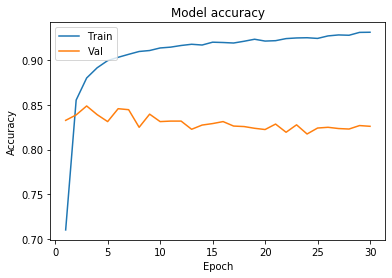

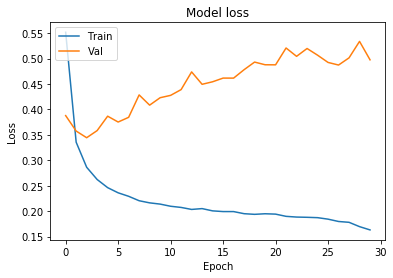

In [13]:
epoch_range=range(1,epochs+1)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [14]:
# testing

sentences = [
    'granny starting to fear spiders in the garden might be real', # ironical
    'the weather today is bright and sunny'               # not ironical
]

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post', maxlen=max_length, truncating='post')

print(model.predict(padded)) 

[[0.88373864]
 [0.00143081]]
